## train.ipynb: Define and Train the model

In [1]:
# Import the necessary libraries
import numpy as np
import scipy
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
K.set_image_dim_ordering('th')
from keras.utils import np_utils
#from sklearn.cross_validation import StratifiedKFold

Using TensorFlow backend.


In [2]:
# Global Variables
# The number of principal components to be retained in the PCA algorithm, 
# the number of retained features  n
numPCAcomponents = 30
# Patches windows size
windowSize = 5
# The proportion of Test sets
testRatio = 0.50

In [3]:
# load Preprocessed data from file
X_train = np.load("./predata/XtrainWindowSize" 
                  + str(windowSize) + "PCA" + str(numPCAcomponents) + 
                  "testRatio" + str(testRatio)  + ".npy")
y_train = np.load("./predata/ytrainWindowSize" 
                  + str(windowSize) + "PCA" + str(numPCAcomponents) + 
                  "testRatio" + str(testRatio) + ".npy")
X_test = np.load("./predata/XtestWindowSize" 
                  + str(windowSize) + "PCA" + str(numPCAcomponents) + 
                 "testRatio" + str(testRatio)  + ".npy")
y_test = np.load("./predata/ytestWindowSize" 
                  + str(windowSize) + "PCA" + str(numPCAcomponents) + 
                 "testRatio" + str(testRatio) + ".npy")

In [4]:
# Reshape data into (numberofsumples, channels, height, width)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[3], 
                               X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[3], 
                             X_test.shape[1], X_test.shape[2]))

# convert class labels to on-hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Define the input shape 
input_shape= X_train[0].shape
print(input_shape)

# number of filters
C1 = 3*numPCAcomponents

(30, 5, 5)


In [5]:
# Define the model structure
model = Sequential()

model.add(Conv2D(C1, (3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(3*C1, (3, 3), activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(6*numPCAcomponents, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='softmax'))

In [6]:
# Define optimization and train method
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.9, patience=25, 
                              min_lr=0.000001, verbose=1)
checkpointer = ModelCheckpoint(filepath="checkpoint.hdf5", verbose=1, 
                              save_best_only=False)
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
                              metrics=['accuracy'])

In [7]:
# Start to train model 
history = model.fit(X_train, y_train, 
                    batch_size=32, 
                    epochs=100, 
                    verbose=1, 
                    validation_data=(X_test, y_test),
                    callbacks=[reduce_lr, checkpointer],
                    shuffle=True)

Train on 20110 samples, validate on 5183 samples
Epoch 1/100
20110/20110 [==============================] - 5s 233us/step - loss: 1.2813 - acc: 0.6164 - val_loss: 0.6084 - val_acc: 0.8057

Epoch 00001: saving model to checkpoint.hdf5
Epoch 2/100
20110/20110 [==============================] - 4s 177us/step - loss: 0.3752 - acc: 0.8783 - val_loss: 0.3269 - val_acc: 0.8956

Epoch 00002: saving model to checkpoint.hdf5
Epoch 3/100
20110/20110 [==============================] - 4s 175us/step - loss: 0.2231 - acc: 0.9304 - val_loss: 0.2492 - val_acc: 0.9168

Epoch 00003: saving model to checkpoint.hdf5
Epoch 4/100
20110/20110 [==============================] - 4s 175us/step - loss: 0.1534 - acc: 0.9529 - val_loss: 0.1856 - val_acc: 0.9429

Epoch 00004: saving model to checkpoint.hdf5
Epoch 5/100
20110/20110 [==============================] - 4s 174us/step - loss: 0.1112 - acc: 0.9662 - val_loss: 0.1563 - val_acc: 0.9518

Epoch 00005: saving model to checkpoint.hdf5
Epoch 6/100
20110/20110 [=

20110/20110 [==============================] - 4s 189us/step - loss: 0.0034 - acc: 0.9995 - val_loss: 0.0752 - val_acc: 0.9784

Epoch 00044: saving model to checkpoint.hdf5
Epoch 45/100
20110/20110 [==============================] - 4s 190us/step - loss: 0.0032 - acc: 0.9995 - val_loss: 0.0770 - val_acc: 0.9788

Epoch 00045: saving model to checkpoint.hdf5
Epoch 46/100
20110/20110 [==============================] - 4s 191us/step - loss: 0.0029 - acc: 0.9998 - val_loss: 0.0768 - val_acc: 0.9776

Epoch 00046: saving model to checkpoint.hdf5
Epoch 47/100
20110/20110 [==============================] - 4s 189us/step - loss: 0.0034 - acc: 0.9995 - val_loss: 0.0767 - val_acc: 0.9774

Epoch 00047: saving model to checkpoint.hdf5
Epoch 48/100
20110/20110 [==============================] - 4s 189us/step - loss: 0.0038 - acc: 0.9994 - val_loss: 0.0786 - val_acc: 0.9778

Epoch 00048: saving model to checkpoint.hdf5
Epoch 49/100
20110/20110 [==============================] - 4s 188us/step - loss: 0

In [8]:
# save the model with h5py
import h5py
from keras.models import load_model
model.save('./model/HSI_model_epochs100.h5')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


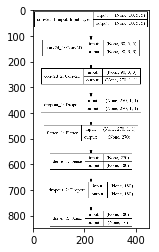

In [9]:
# using plot_model module to save the model figure
from keras.utils import plot_model
plot_model(model, to_file='./model/model.png', show_shapes=True)
print(history.history.keys())

# show the model figure
import matplotlib.pyplot as plt
%matplotlib inline
model_img = plt.imread('./model/model.png')
plt.imshow(model_img, shape=(10, 10))
plt.show()

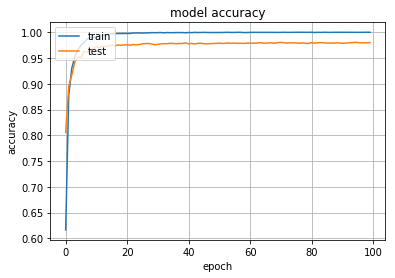

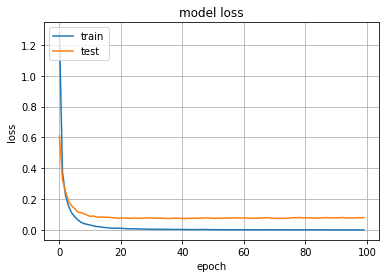

In [10]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(['train', 'test'], loc='upper left') 
plt.savefig("./result/model_accuracy_100.svg")
plt.show()

# summarize history for loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(['train', 'test'], loc='upper left') 
plt.savefig("./result/model_loss_100.svg")
plt.show()